# Importing Libraries

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns

raw_data=pd.read_csv("breast-cancer.csv")

In [2]:
print(raw_data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

# Cleaning and pre-processing the dataset

In [9]:
raw_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [124]:
raw_data.duplicated().sum()

0

In [13]:
type(raw_data)

pandas.core.frame.DataFrame

In [16]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
core_data=raw_data[["id","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","diagnosis"]].copy()
print(core_data.head())

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean diagnosis  
0         0.2419                 0.07871         M  
1         0.1812

In [23]:
core_data.isna().sum()

id                        0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
diagnosis                 0
dtype: int64

In [24]:
core_data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [25]:
core_data.dtypes

id                          int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
diagnosis                  object
dtype: object

In [81]:
# Just seperating some values from orginal dataset for manually testing the model
test_values=core_data[-3::].copy()
core_data=core_data.iloc[:-3]

In [82]:
test_values

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,B


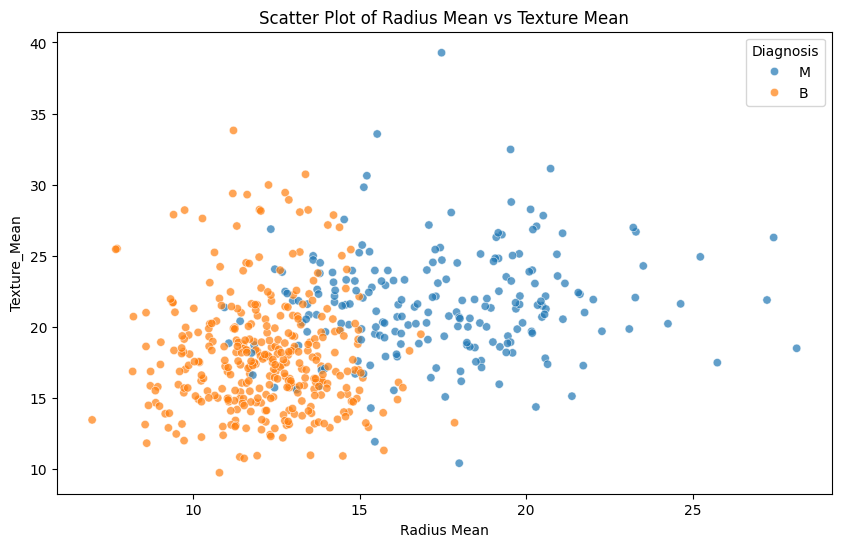

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=core_data, x="radius_mean", y='texture_mean', hue='diagnosis', alpha=0.7)
plt.title(f'Scatter Plot of Radius Mean vs Texture Mean')
plt.xlabel("Radius Mean")
plt.ylabel('Texture_Mean')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

# Splitting test and train dataset

In [84]:
x=core_data.drop(["id","diagnosis"],axis=1)
y=core_data["diagnosis"]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Training the model (model - Logistic Regression)

In [85]:
reg=LogisticRegression(max_iter=10000)
reg.fit(X_train,Y_train)


LogisticRegression(max_iter=10000)

# Model prediction and accuraccy report

In [86]:
Y_pred = reg.predict(X_test)
Y_proba = reg.predict_proba(X_test)[:,1]
print("Model: Logistic Regression")
print(classification_report(Y_test,Y_pred))
roc_auc=roc_auc_score(Y_test,Y_proba)
print("AUC-ROC:",roc_auc)

Model: Logistic Regression
              precision    recall  f1-score   support

           B       0.93      0.95      0.94       110
           M       0.90      0.87      0.88        60

    accuracy                           0.92       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170

AUC-ROC: 0.9825757575757575


In [125]:
test_values

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,B


# Loading and saving model

In [152]:
import pickle
filename="TM_BreastCancer.sav"
pickle.dump(reg,open(filename,'wb'))

In [158]:
pickle.dump(scaler,open("Sclae_BreastCancer.sav",'wb'))

In [159]:
load_scaler=pickle.load(open("Sclae_BreastCancer.sav",'rb'))

In [160]:
load_model=pickle.load(open("TM_BreastCancer.sav",'rb'))

# Manual Testing

In [154]:
input_data=(7.76, 24.54, 47.92, 181.0, 0.05263, 0.04362, 0.0, 0.0,0.1587, 0.05884)#(16.6, 28.08, 108.3, 858.1, 0.08455, 0.1023, 0.09251,0.05302, 0.159, 0.05648)

In [161]:
s=np.asanyarray(input_data)
s=s.reshape(1,-1)
s=load_scaler.transform(s)
pred=load_model.predict(s)
print(pred)
if(pred[0]=="B"):
    print("No chances of Breast Cancer")
else:
    print("There is a chance of Breast Cancer")

['B']
No chances of Breast Cancer


C:\Users\saran\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
